In [1]:
%matplotlib inline
import numpy as np

### Data Loading 

In [2]:
# Useful Constants
# Output classes to learn how to classify
LABELS = [    
    "JUMPING",
    "JUMPING_JACKS",
    "BOXING",
    "WAVING_2HANDS",
    "WAVING_1HAND",
    "CLAPPING_HANDS"

] 
DATASET_PATH = "data/HAR_pose_activities/database/"

X_train_path = DATASET_PATH + "X_train.txt"
X_test_path = DATASET_PATH + "X_test.txt"

y_train_path = DATASET_PATH + "Y_train.txt"
y_test_path = DATASET_PATH + "Y_test.txt"

n_steps = 32 # 32 timesteps per series
n_categories = len(LABELS)

In [3]:
# Load the kinect joints and arrange in increasing order 
def read_from_file(folderName):
        fileJoints = 'D:/UBC_Coursework/Term2/571T/Project/Kinect/RGB/joints/'+ folderName +'.txt'
        with open(fileJoints, 'r') as f:
                data = f.read()
        data = data.split('\n')
        data = data[:-1]
        data = [np.fromstring(d, sep=' ') for d in data]
        data = np.array(data)
        #print(data)
        new_data = data[data[:, 0].argsort()]
        return new_data
        #data = data[:, 1:] ### remove the first column
        #print(len(data))
        #len(new_data)
        #new_data[0][0]

In [4]:
fileLabel = 'D:/UBC_Coursework/Term2/571T/Project/Kinect/RGB/ActionLabels.txt'
fileY = 'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/database_kinect/Y_train.txt'

action = [    
    "walk:",
    "sitDown:",
    "standUp:",
    "pickUp:",
    "carry:",
    "throw:",
    "push:",
    "pull:",
    "waveHands:",
    "clapHands:"
] 

valuesDict = []
numLabels =[]

with open(fileLabel, 'r') as f:
    LabelFile = f.read()
LabelFile = LabelFile.split('\n')
len(LabelFile)
folderName = []
imageRangeForAction = {}
for i in range(len(LabelFile)):
    if i % 11 == 0:
        folderName.append(LabelFile[i])
        valuesDict.append(['-1','-1'])
    else:
        # put first column as key and the rest as value
        imageRangeForAction[LabelFile[i].split(' ')[0]+str(i)] = [x for x in LabelFile[i].split(' ')[1:]]
        actionLabel = i % 11
        valuesDict.append(imageRangeForAction[action[actionLabel-1]+str(i)])

for i in range(len(valuesDict)):
    if(valuesDict[i][1] != -1):
        numLabels.append(int(valuesDict[i][1]) - int(valuesDict[i][0]) + 1)


        #with open(fileY, 'a') as f:
        #    for i in range(numLabels + 1):
        #        f.write(str(actionLabel))
        #        f.write('\n')
            

#valuesDict


In [5]:
####Working
##### Kinect joints in increasing order written to separate text files

######## TODO: all files rae same. Not according to s01_e01 and add only the images needed in files, Prepare Y
'''counter = 0
hasEntered = False

folderName2 = folderName[:-1]

fileName_yTrain = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTrain.txt',"w+")
fileName_xTrain = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTrain.txt',"w+")
for i in range(len(folderName2)):
    fileName_train_Kinect = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/' + folderName[i] + '.txt',"w+")
    new_data = read_from_file(folderName[i])
    counter = counter+1
    yCounter = 1
    for a in range(10):
        #print("range(10) yCounter: ", yCounter) 
        for j in range(len(new_data)):
            #print("(len(new yCounter: ", yCounter) 
            if new_data[j][0] >= int(valuesDict[counter][0]) and new_data[j][0] <= int(valuesDict[counter][1]):
                hasEntered = True
                for k in range(41):
                    fileName_train_Kinect.write(str(new_data[j][k]))
                    fileName_train_Kinect.write(' ')
                fileName_train_Kinect.write("\n") 
                fileName_yTrain.write(str(yCounter))
                fileName_yTrain.write("\n") 
                #print("yCounter: ", yCounter)         
            else:
                if hasEntered == True:
                    hasEntered = False 
                    counter = counter + 1
                    yCounter = yCounter + 1
                    #print("yCounter: ", yCounter) 
                    break
fileName_train_Kinect.close()
fileName_yTrain.close()'''

'counter = 0\nhasEntered = False\n\nfolderName2 = folderName[:-1]\n\nfileName_yTrain = open(\'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTrain.txt\',"w+")\nfileName_xTrain = open(\'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTrain.txt\',"w+")\nfor i in range(len(folderName2)):\n    fileName_train_Kinect = open(\'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/\' + folderName[i] + \'.txt\',"w+")\n    new_data = read_from_file(folderName[i])\n    counter = counter+1\n    yCounter = 1\n    for a in range(10):\n        #print("range(10) yCounter: ", yCounter) \n        for j in range(len(new_data)):\n            #print("(len(new yCounter: ", yCounter) \n            if new_data[j][0] >= int(valuesDict[counter][0]) and new_data[j][0] <= int(valuesDict[counter][1]):\n                hasEntered = True\n                for k in range(41):\n           

In [6]:

##### Kinect joints in increasing order written to separate text files
####### create X_train and Y_train

######## TODO: all files rae same. Not according to s01_e01 and add only the images needed in files, Prepare Y
counter = 0
hasEntered = False

#folderName2 = folderName[:-1]
folderName2 = folderName

fileName_yTrain = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTrain.txt',"w+")
fileName_xTrain = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTrain.txt',"w+")

fileName_yTest = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTest.txt',"w+")
fileName_xTest = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTest.txt',"w+")
for i in range(len(folderName2)):
    fileName_train_Kinect = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/' + folderName[i] + '.txt',"w+")
    new_data = read_from_file(folderName[i])
    counter = counter+1
    yCounter = 1
    if i != 18 and i != 19:
        for a in range(10):
            #print("range(10) yCounter: ", yCounter) 
            for j in range(len(new_data)):
                #print("(len(new yCounter: ", yCounter) 
                if new_data[j][0] >= int(valuesDict[counter][0]) and new_data[j][0] <= int(valuesDict[counter][1]):
                    hasEntered = True
                    for k in range(41):
                        fileName_train_Kinect.write(str(new_data[j][k]))
                        fileName_train_Kinect.write(' ')
                        fileName_xTrain.write(str(new_data[j][k]))
                        fileName_xTrain.write(' ')
                    fileName_train_Kinect.write("\n") 
                    fileName_xTrain.write("\n")
                    fileName_yTrain.write(str(yCounter))
                    fileName_yTrain.write("\n") 
                    #print("yCounter: ", yCounter)         
                else:
                    if hasEntered == True:
                        hasEntered = False 
                        counter = counter + 1
                        yCounter = yCounter + 1
                        #print("yCounter: ", yCounter) 
                        break
    else:
        for a in range(10):
            #print("range(10) yCounter: ", yCounter) 
            for j in range(len(new_data)):
                #print("(len(new yCounter: ", yCounter) 
                if new_data[j][0] >= int(valuesDict[counter][0]) and new_data[j][0] <= int(valuesDict[counter][1]):
                    hasEntered = True
                    for k in range(41):
                        fileName_train_Kinect.write(str(new_data[j][k]))
                        fileName_train_Kinect.write(' ')
                        fileName_xTest.write(str(new_data[j][k]))
                        fileName_xTest.write(' ')
                    fileName_train_Kinect.write("\n") 
                    fileName_xTest.write("\n")
                    fileName_yTest.write(str(yCounter))
                    fileName_yTest.write("\n") 
                    #print("yCounter: ", yCounter)         
                else:
                    if hasEntered == True:
                        hasEntered = False 
                        counter = counter + 1
                        yCounter = yCounter + 1
                        #print("yCounter: ", yCounter) 
                        break
fileName_train_Kinect.close()
fileName_yTrain.close()
fileName_xTrain.close()
fileName_yTest.close()
fileName_xTest.close()

In [7]:
### Arrange in the format that HAR wants
fileJointsYTrain_fread = 'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTrain.txt'
fileJointsXTrain_fread = 'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTrain.txt'

fileJointsYTrain_final = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTrainFinal.txt',"w+")
fileJointsXTrain_final = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTrainFinal.txt',"w+")

with open(fileJointsYTrain_fread, 'r') as f:
        dataY = f.read()
dataY = dataY.split('\n')
dataY = dataY[:-1]
dataY = np.array(dataY)

with open(fileJointsXTrain_fread, 'r') as f:
        dataX = f.read()
dataX = dataX.split('\n')
dataX = dataX[:-1]
dataX = [np.fromstring(d, sep=' ') for d in dataX]
dataX = np.array(dataX)

for q in range(11):
        for i in range(len(dataY)):
                dataY[i] = int(dataY[i])

                if int(dataY[i]) == q+1:
                        fileJointsYTrain_final.write(str(q))
                        fileJointsYTrain_final.write("\n")
                        for w in range(40):
                                fileJointsXTrain_final.write(str(dataX[i][w+1]))
                                fileJointsXTrain_final.write(' ')
                        fileJointsXTrain_final.write("\n")

fileJointsYTrain_final.close()
fileJointsXTrain_final.close()

fileJointsYTrain_final1 = 'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTrainFinal.txt'
fileJointsXTrain_final1 = 'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTrainFinal.txt'

with open(fileJointsYTrain_final1, 'r') as f:
        dataY1 = f.read()
dataY1 = dataY1.split('\n')
dataY1 = dataY1[:-1]
dataY1 = np.array(dataY1)

with open(fileJointsXTrain_final1, 'r') as f:
        dataX1 = f.read()
dataX1 = dataX1.split('\n')
dataX1 = dataX1[:-1]
dataX1 = [np.fromstring(d, sep=' ') for d in dataX1]
dataX1 = np.array(dataX1)
X_train_new_kinect = np.zeros((len(dataX1),1),dtype=np.float32)
X_train_kinect = np.zeros((5145,40),dtype=np.float32)
X_train_new_kinect = dataX1

ylen = 147 ##### 5145/35
indexY = 0
sumY = 0
Y_train_Kinect = np.zeros((ylen,1),dtype=np.int32)
for i in range(len(dataY1)):
        sumY += float(dataY1[i])
        #if i is a multiple of 35
        if (i+1)%35 == 0 and i != 5145: 
                Y_train_Kinect[indexY] = int(sumY/35) ###########TODO : always takes floor. Check if this needs to be changed
                indexY += 1
                sumY = 0

#X_train_new_kinect = X_train_new_kinect[0:5145,:]

for q in range(len(X_train_new_kinect)):
        for w in range(40):
                X_train_kinect[q][w] = np.float32(X_train_new_kinect[q][w])


#################### Xdata len = 5145

In [9]:
len(dataX)
X_train_kinect.shape

(5145, 40)

In [8]:
fileJointsYTest_fread = 'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTest.txt'
fileJointsXTest_fread = 'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTest.txt'

fileJointsYTest_final = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTestFinal.txt',"w+")
fileJointsXTest_final = open('D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTestFinal.txt',"w+")

with open(fileJointsYTest_fread, 'r') as f:
        dataYTest = f.read()
dataYTest = dataYTest.split('\n')
dataYTest = dataYTest[:-1]
dataYTest = np.array(dataYTest)

with open(fileJointsXTest_fread, 'r') as f:
        dataXTest = f.read()
dataXTest = dataXTest.split('\n')
dataXTest = dataXTest[:-1]
dataXTest = [np.fromstring(d, sep=' ') for d in dataXTest]
dataXTest = np.array(dataXTest)

for q in range(11):
        for i in range(len(dataYTest)):
                dataYTest[i] = int(dataYTest[i])

                if int(dataYTest[i]) == q+1:
                        fileJointsYTest_final.write(str(q))
                        fileJointsYTest_final.write("\n")
                        for w in range(40):
                                fileJointsXTest_final.write(str(dataXTest[i][w+1]))
                                fileJointsXTest_final.write(' ')
                        fileJointsXTest_final.write("\n")

fileJointsYTest_final.close()
fileJointsXTest_final.close()


fileJointsYTest_final1 = 'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/yTestFinal.txt'
fileJointsXTest_final1 = 'D:/UBC_Coursework/Term2/571T/Project/HAR/LSTM-Pytorch/data/HAR_pose_activities/Joints_kinect/xTestFinal.txt'

with open(fileJointsYTest_final1, 'r') as f:
        dataY1Test = f.read()
dataY1Test = dataY1Test.split('\n')
dataY1Test = dataY1Test[:-1]
dataY1Test = np.array(dataY1Test)

with open(fileJointsXTest_final1, 'r') as f:
        dataX1Test = f.read()
dataX1Test = dataX1Test.split('\n')
dataX1Test = dataX1Test[:-1]
dataX1Test = [np.fromstring(d, sep=' ') for d in dataX1Test]
dataX1Test = np.array(dataX1Test)

X_test_new_kinect = np.zeros((len(dataX1Test),1),dtype=np.float32)
X_test_kinect = np.zeros((700,40),dtype=np.float32)
X_test_new_kinect = dataX1Test

ylenTest = 20 ##### 700/35
indexYTest = 0
sumYTest = 0
Y_test_Kinect = np.zeros((ylenTest,1),dtype=np.int32)
for i in range(len(dataY1Test)):
        sumYTest += float(dataY1Test[i])
        #if i is a multiple of 35
        if (i+1)%35 == 0 and i != 700: 
                Y_test_Kinect[indexYTest] = int(sumYTest/35) ###########TODO : always takes floor. Check if this needs to be changed
                indexYTest += 1
                sumYTest = 0

#X_test_new_kinect = X_test_new_kinect[0:700,:]


for q in range(len(X_test_new_kinect)):
        for w in range(40):
                X_test_kinect[q][w] = np.float32(X_test_new_kinect[q][w])

In [9]:
len(dataXTest)
Y_test_Kinect[19]
dataY1Test
len(dataY1Test)
Y_test_Kinect

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [3],
       [3],
       [3],
       [4],
       [4],
       [4],
       [5],
       [6],
       [7],
       [8],
       [8],
       [8],
       [9]])

In [10]:
# Useful Constants
# Output classes to learn how to classify
LABELS_KINECT = [    
    "WALK",
    "SITDOWN",
    "STANDUP",
    "PICKUP",
    "CARRY",
    "THROW",
    "PUSH",
    "PULL",
    "WAVEHANDS",
    "CLAPHANDS"
] 

'''DATASET_PATH = "data/HAR_pose_activities/database_kinect/"

X_train_path = DATASET_PATH + "xTrainFinal.txt"
X_test_path = DATASET_PATH + "xTrainFinal.txt"

y_train_path = DATASET_PATH + "yTrainFinal.txt"
y_test_path = DATASET_PATH + "xTrainFinal.txt"'''

n_steps = 35 # 35 timesteps per series
n_categories_kinect = len(LABELS_KINECT)

#Train Data
print(len(X_train_kinect))
blocks = int(len(X_train_kinect) / n_steps) 
X_train_kinect = np.array(np.split(X_train_kinect,blocks))
print(len(X_train_kinect))

#Test Data
print(len(X_test_kinect))
blocks = int(len(X_test_kinect) / n_steps) 
X_test_kinect = np.array(np.split(X_test_kinect,blocks))
print(len(X_test_kinect))


5145
147
700
20


### Pre-Process 

In [11]:
import torch

In [12]:
tensor_X_test = torch.from_numpy(X_test_kinect)
print('test_data_size:',tensor_X_test.size())
tensor_y_test = torch.from_numpy(Y_test_Kinect)
print('test_label_size:',tensor_y_test.size())
n_data_size_test = tensor_X_test.size()[0]
print('n_data_size_test:',n_data_size_test)

tensor_X_train = torch.from_numpy(X_train_kinect)
print('train_data_size:',tensor_X_train.size())
tensor_y_train = torch.from_numpy(Y_train_Kinect)
print('train_label_size:',tensor_y_train.size())
n_data_size_train = tensor_X_train.size()[0]
print('n_data_size_train:',n_data_size_train) 

test_data_size: torch.Size([20, 35, 40])
test_label_size: torch.Size([20, 1])
n_data_size_test: 20
train_data_size: torch.Size([147, 35, 40])
train_label_size: torch.Size([147, 1])
n_data_size_train: 147


In [13]:
X_train_kinect.shape

(147, 35, 40)

In [14]:
import torch.nn as nn

In [15]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [16]:
class LSTM(nn.Module):
    
    def __init__(self,input_dim,hidden_dim,output_dim,layer_num):
        super(LSTM,self).__init__()
        self.hidden_dim = hidden_dim 
        self.output_dim = output_dim
        self.lstm = torch.nn.LSTM(input_dim,hidden_dim,layer_num,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim,output_dim)
        self.bn = nn.BatchNorm1d(35)
        
    def forward(self,inputs):
        x = self.bn(inputs)
        lstm_out,(hn,cn) = self.lstm(x)
        out = self.fc(lstm_out[:,-1,:])
        return out

In [17]:
len(LABELS_KINECT)

10

In [18]:
n_hidden = 64
n_joints = 20*2
n_categories = len(LABELS_KINECT)
n_layer = 3
rnn = LSTM(n_joints,n_hidden,n_categories,n_layer)
rnn.to(device)

LSTM(
  (lstm): LSTM(40, 64, num_layers=3, batch_first=True)
  (fc): Linear(in_features=64, out_features=10, bias=True)
  (bn): BatchNorm1d(35, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [19]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    #print("top_i", top_i)
    category_i = top_i[0].item()
    return LABELS_KINECT[category_i], category_i

In [20]:
import random
def randomTrainingExampleBatch(batch_size,flag,num=-1):
    if flag == 'train':
        X = tensor_X_train
        y = tensor_y_train
        data_size = n_data_size_train
    elif flag == 'test':
        X = tensor_X_test
        y = tensor_y_test
        data_size = n_data_size_test
    if num == -1:
        ran_num = random.randint(0,data_size-batch_size)
    else:
        ran_num = num
    pose_sequence_tensor = X[ran_num:(ran_num+batch_size)] 
    pose_sequence_tensor = pose_sequence_tensor 
    category_tensor = y[ran_num:ran_num+batch_size,:]
    return category_tensor.long(),pose_sequence_tensor

In [21]:
tensor_y_train.size()

torch.Size([147, 1])

### Training

In [13]:
#try:
#    rnn.load_state_dict(torch.load('lstm_6.pkl'))
#except:
#    print('no pkl')

In [22]:
import torch.optim as optim
import time
import math

criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = optim.SGD(rnn.parameters(),lr=learning_rate,momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10000, gamma=0.1)

n_iters = 100000
#n_iters = 60000
print_every = 1000
plot_every = 1000
batch_size = 64

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
   
    category_tensor, input_sequence = randomTrainingExampleBatch(batch_size,'train')
    #print("category_tensor : ", category_tensor)
    input_sequence = input_sequence.to(device)
    category_tensor = category_tensor.to(device)
    category_tensor = torch.squeeze(category_tensor)
    
    optimizer.zero_grad()
    
    output = rnn(input_sequence)
    loss = criterion(output, category_tensor)
    loss.backward()
    optimizer.step() 
    #scheduler.step()
    
    #如果tensor只有一个元素,那么可以用.item()的方法取出这个元素作为普通的python数字.
    current_loss += loss.item()
    
    category = LABELS_KINECT[int(category_tensor[0])]

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f  / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, guess, correct))
        
    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

1000 1% (0m 17s) 1.8265  / CARRY ✗ (SITDOWN)
2000 2% (0m 28s) 2.3676  / CARRY ✓
3000 3% (0m 38s) 1.7240  / CARRY ✗ (SITDOWN)
4000 4% (0m 48s) 1.7983  / CARRY ✓
5000 5% (0m 57s) 1.6759  / CARRY ✗ (WALK)
6000 6% (1m 7s) 1.7138  / CARRY ✓
7000 7% (1m 17s) 0.6341  / STANDUP ✗ (SITDOWN)
8000 8% (1m 26s) 1.1009  / CARRY ✓
9000 9% (1m 36s) 0.4689  / PICKUP ✓
10000 10% (1m 47s) 0.4837  / WALK ✓
11000 11% (1m 57s) 0.3680  / WALK ✓
12000 12% (2m 6s) 0.3302  / STANDUP ✓
13000 13% (2m 15s) 0.3032  / WALK ✓
14000 14% (2m 25s) 0.1888  / CARRY ✓
15000 15% (2m 34s) 0.1685  / SITDOWN ✓
16000 16% (2m 44s) 0.0462  / SITDOWN ✓
17000 17% (2m 53s) 0.1248  / PICKUP ✓
18000 18% (3m 1s) 0.0989  / PICKUP ✓
19000 19% (3m 10s) 0.0800  / PICKUP ✓
20000 20% (3m 19s) 0.0186  / WALK ✓
21000 21% (3m 28s) 0.0450  / PICKUP ✓
22000 22% (3m 38s) 0.0322  / STANDUP ✓
23000 23% (3m 47s) 0.0252  / SITDOWN ✓
24000 24% (3m 56s) 0.0124  / WALK ✓
25000 25% (4m 5s) 0.0073  / SITDOWN ✓
26000 26% (4m 14s) 0.0184  / CARRY ✓
27000 27%

In [23]:
len(output)

64

In [24]:
print(output.shape)
print(category_tensor.shape)

torch.Size([64, 10])
torch.Size([64])


In [25]:
output

tensor([[ 3.9020e+00,  3.5198e+00,  1.2245e+00,  1.2391e+01, -7.4557e-01,
         -4.4963e+00, -3.0968e+00, -4.4419e+00, -4.8664e+00, -2.8460e+00],
        [ 3.5972e+00,  3.3580e+00,  1.0432e+00,  1.2042e+01, -7.7900e-01,
         -4.1832e+00, -2.8714e+00, -4.3736e+00, -4.3260e+00, -2.9700e+00],
        [ 3.7522e+00,  3.5163e+00,  9.6867e-01,  1.2211e+01, -5.1437e-01,
         -4.3810e+00, -2.8902e+00, -4.5766e+00, -4.6457e+00, -2.8467e+00],
        [ 3.6615e+00,  3.2462e+00,  8.3111e-01,  1.2090e+01, -4.2099e-01,
         -4.1286e+00, -2.8770e+00, -4.5346e+00, -4.3523e+00, -2.9007e+00],
        [ 3.6047e+00, -6.5545e-02, -3.4114e+00,  5.2996e-01,  1.1903e+01,
         -1.0613e+00, -2.6406e+00, -4.3652e+00, -4.3808e+00,  1.1304e-01],
        [ 4.0036e+00,  9.6712e-02, -3.4434e+00,  6.9909e-01,  1.2211e+01,
         -1.3094e+00, -2.6983e+00, -4.6138e+00, -4.9024e+00,  2.6515e-01],
        [ 3.9900e+00, -1.0281e-02, -3.5014e+00,  6.8696e-01,  1.2220e+01,
         -1.1680e+00, -2.7143e+0

In [26]:
torch.save(rnn.state_dict(),'lstm_kinect_train_test_bn.pkl')

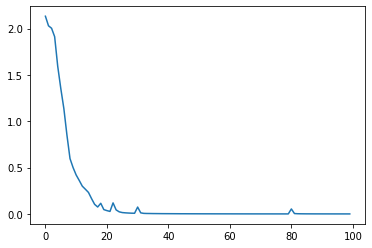

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

### Testing

In [28]:
def test(flag):
    if flag == 'train':
        n = n_data_size_train
    elif flag == 'test':
        n = n_data_size_test   
        
    with torch.no_grad():
        right = 0
        for i in range(n):
            category_tensor, inputs = randomTrainingExampleBatch(1,flag,i)
            category = LABELS_KINECT[int(category_tensor[0])]
            inputs = inputs.to(device)
            output = rnn(inputs)
            guess, guess_i = categoryFromOutput(output)
            category_i = LABELS_KINECT.index(category)
            if category_i == guess_i:
                right+=1
    print(flag,'accuracy',right/n)

In [29]:

test('test')

test accuracy 0.4


In [30]:
test('train')

train accuracy 0.7959183673469388


C:\Users\anush\AppData\Local\Temp/ipykernel_21844/1325638114.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + LABELS_KINECT, rotation=90)
C:\Users\anush\AppData\Local\Temp/ipykernel_21844/1325638114.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + LABELS_KINECT)


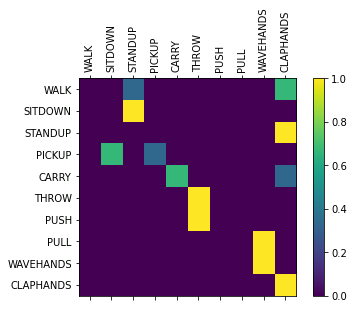

In [31]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = n_data_size_test

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category_tensor, inputs = randomTrainingExampleBatch(1,'test',i)
    category = LABELS_KINECT[int(category_tensor[0])]
    inputs = inputs.to(device)
    output = rnn(inputs)
    #print("output: ",output)
    guess, guess_i = categoryFromOutput(output)
    #print("i: ",i)
    #print("guess: ",guess)
    #print("guess_i: ",guess_i)
    #print("category_i: ",category_i)
    category_i = LABELS_KINECT.index(category)
    confusion[category_i][guess_i] += 1
     
# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + LABELS_KINECT, rotation=90)
ax.set_yticklabels([''] + LABELS_KINECT)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

1. Loss : Cross Entropy Loss
2. Batch size: 128
3. Batch size for every label: 32
4. Randomly the 128-size batch is chosen from input and sent to the model
5. SGD is the optimizer